# Dynamic Graph Visualization and Analysis

This notebook contains TGX for visualizations and obtaining dataset statistics.

For comprehensive API references, visit [TGX website](https://complexdata-mila.github.io/TGX/).


In [1]:
import tgx
from tgx.utils.plotting_utils import plot_for_snapshots

### Load TGB Dataset

For the examples used in this tutorials, first, load the [TGB](https://tgb.complexdatalab.com/) datasets in TGX from 
[Temporal Graph Benchmark for Machine Learning on Temporal Graphs (NeurIPS 2023 Datasets and Benchmarks Track)](https://openreview.net/forum?id=qG7IkQ7IBO).

<div class="alert alert-block alert-info">
    <b>Tip:</b> For all suported TGB datasets, see <a href="https://github.com/ComplexData-MILA/TGX/blob/master/tgx/data/tgb.py"><b>tgx/data/tgb.py</b></a> and <a href="https://complexdata-mila.github.io/TGX/tutorials/data_loader/"><b>data loading tutorial</b></a>
</div>

In [2]:
data_name = "tgbl-flight"
fig_size = (9, 6)
font_size = 16
ticks_font_size = 12
dataset = tgx.tgb_data(data_name)

raw file found, skipping download
Dataset directory is  /home/hang/project/tgn-st-main/tgb/datasets/tgbl_flight
loading processed file
validation point: 1640754000.0
Test point: 1655092800.0


### Graph Discretization for Visualization

We can discretize a temporal graph into snapshots (i.e., equally spaced durations) for visualization purposes.

In [3]:
ctdg = tgx.Graph(dataset) # retrieve the continuous time dynamic graph
time_scale = "monthly" #"minutely", "hourly", "daily", "weekly", "monthly", "yearly", "biyearly"
dtdg, ts_list = ctdg.discretize(time_scale=time_scale, store_unix=True)

Number of loaded edges: 86686
Number of unique edges:7742
Available timestamps:  1385
Discretizing data to 47 timestamps...


In [4]:
# Importing datetime module
import datetime
import numpy as np
date_ls = []
for ts in np.unique(ts_list):
    date_ls.append(datetime.datetime.fromtimestamp(int(ts)).strftime('%Y-%m'))

len(date_ls)

48

<div class="alert alert-block alert-info">
<b>Tip:</b> The discretization function returns the discretized TG as its first argument (<b>dtdg</b>) and the remapped unix timestamps as its second argument (<b>ts_list</b>). The <b>dtdg</b> has integer timestamps (snapshot ids) thus <b>ts_list</b> keep tracks of the unix timestamps of all edges in the coarsened time granularity.  
</div>

## TGX Features 

TGX provides a suite of visualization tools for better analyzing the dynamics of temporal graphs.

Below is a list of visualization approaches offered by TGX.

<div class="alert alert-block alert-danger">
<b>Important:</b> A discretized graph should be provided as input.
</div>

| Function | Description |
| --- | --- |
| [`tgx.degree_over_time`](#Average-Node-Degree-Over-Time) | Plot the average node degree over time|
| [`tgx.nodes_over_time`](#Number-of-Nodes-Over-Time) | Plot the number of active nodes per snapshot |
| [`tgx.edges_over_time`](#Number-of-Edges-Over-Time) | Plot the number of edges per snapshot |
| [`tgx.nodes_and_edges_over_time`](#Number-of-Nodes-and-Edges-Over-Time) | Plot the number of active nodes and edges in the same figure|
| [`tgx.connected_components_per_ts`](#Number-of-Connected-Components) |Plot the number of connected components per timestamp.|
| [`tgx.degree_density`](#Degree-Density) | Plot the density map of node degrees per time window |
| [`tgx.TEA`](#Temporal-Edge-Appearance-(TEA)-Plot) | Plot Temporal Edge Appearance (TEA) (from [Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg))|
| [`tgx.TET`](#Temporal-Edge-Traffic-(TET)-Plot) | Plot Temporal Edge Traffic (TET) from ([Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg))|


For each visualization tool, you can specify the output path with `filepath`, otherwise the output is saved in the current directory. 

<div class="alert alert-block alert-warning">
<b>Example:</b> <code> tgx.degree_over_time(dtdg, network_name=dataset.name, filepath=filepath) </code>
</div> 

In what follows, we cover some of the visualizations offered by TGX.

### Average Node Degree Over Time
The goal is to plot the average node degree of snapshot. 

In this plot, the *x-axis* is the snapshot index (or timestamps), while the *y-axis* is the average node degree.

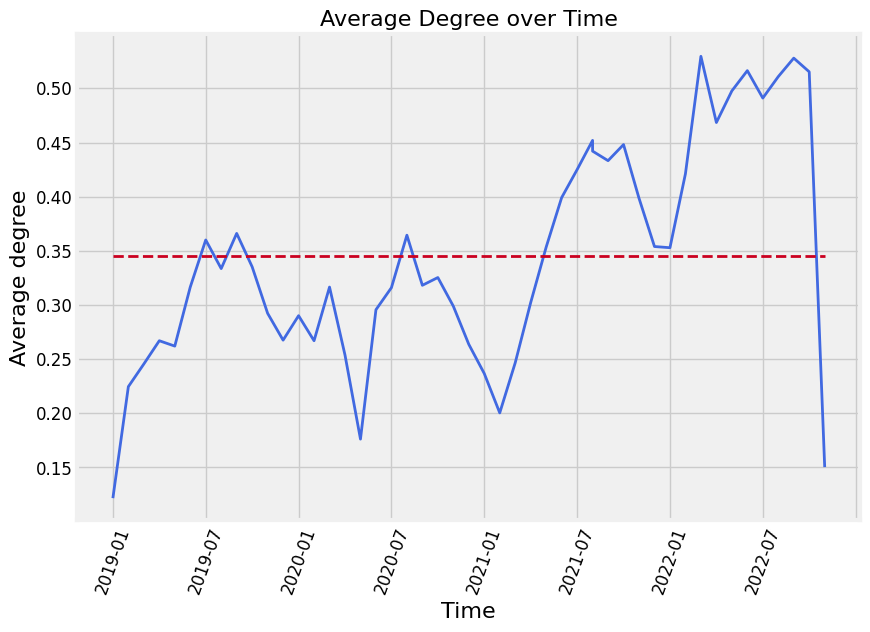

In [5]:
tgx.degree_over_time(dtdg, date_ls, title= "Average Degree over Time", network_name=dataset.name, 
                     fig_size=fig_size, font_size=font_size, ticks_font_size=ticks_font_size)

### Number of Nodes Over Time
The goal is to plot the number of active nodes per snapshot. 

In this plot, *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the number of active nodes.

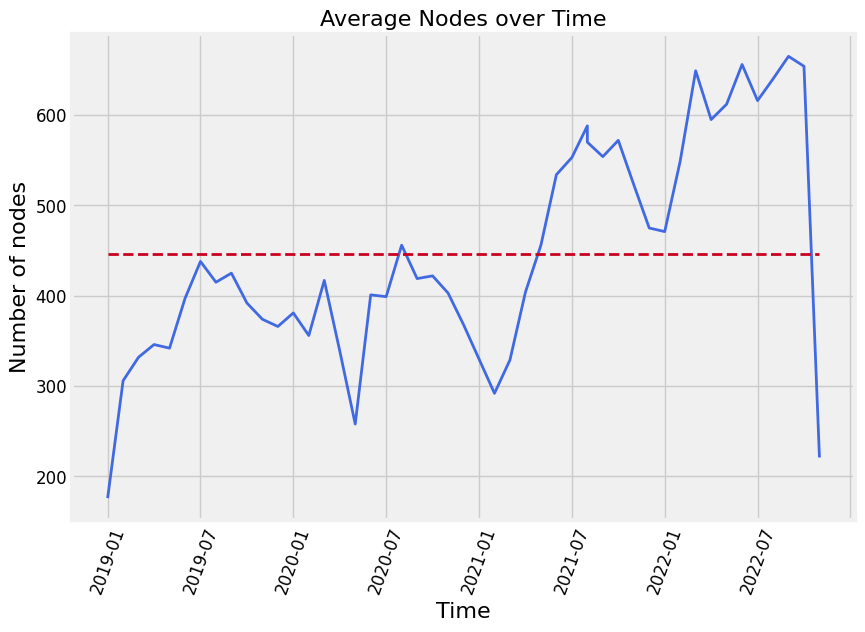

In [6]:
tgx.nodes_over_time(dtdg, date_ls, title= "Average Nodes over Time",network_name=dataset.name, 
                    fig_size=fig_size, font_size=font_size, ticks_font_size=ticks_font_size)

### Number of Edges Over Time
The goal is to plot the number of edges per snapshot. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the number of edges.

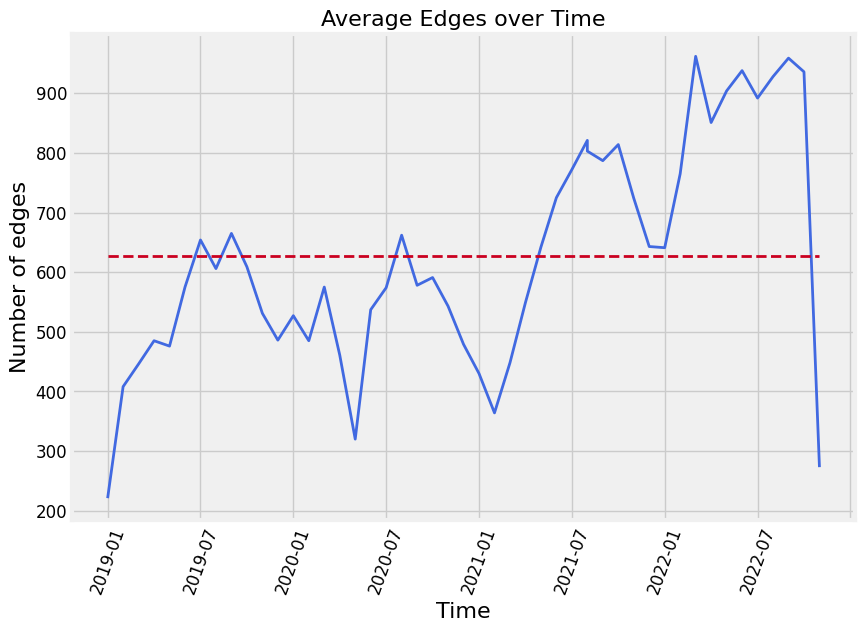

In [7]:
tgx.edges_over_time(dtdg, date_ls, title= "Average Edges over Time", network_name=dataset.name, 
                    fig_size=fig_size, font_size=font_size, ticks_font_size=ticks_font_size)

### Number of Nodes and Edges Over Time
The goal is to plot the number of active nodes and edges per snapshot in the same figure. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the active number of nodes / edges.

Plotting number of nodes and edges per timestamp.


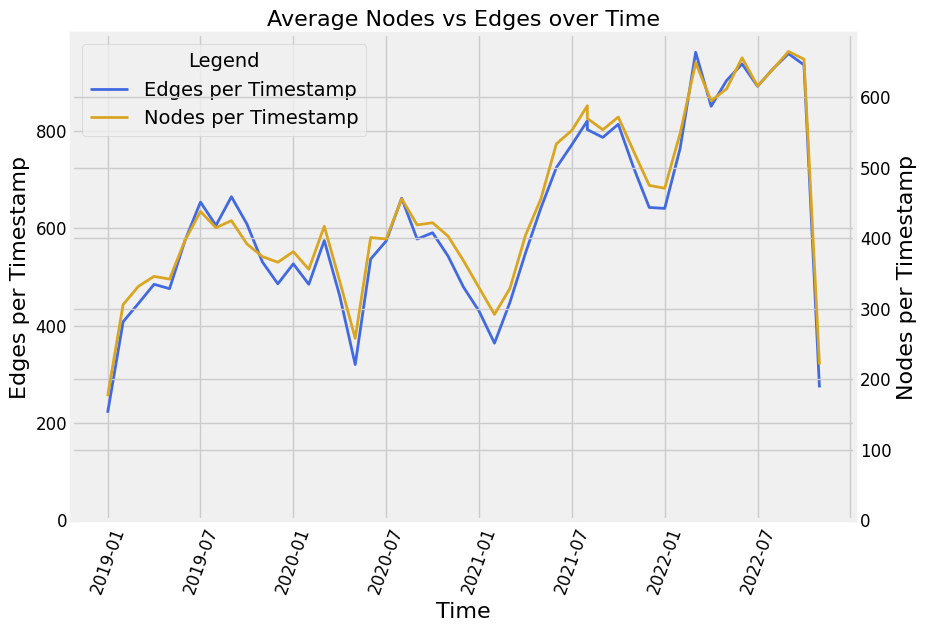

In [8]:
tgx.nodes_and_edges_over_time(dtdg, date_ls, title= "Average Nodes vs Edges over Time", network_name=dataset.name, 
                              fig_size=fig_size, font_size=font_size, ticks_font_size=ticks_font_size)

### Number of Connected Components

The goal is to plot number of connected components per snapshot. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the number of connected components.

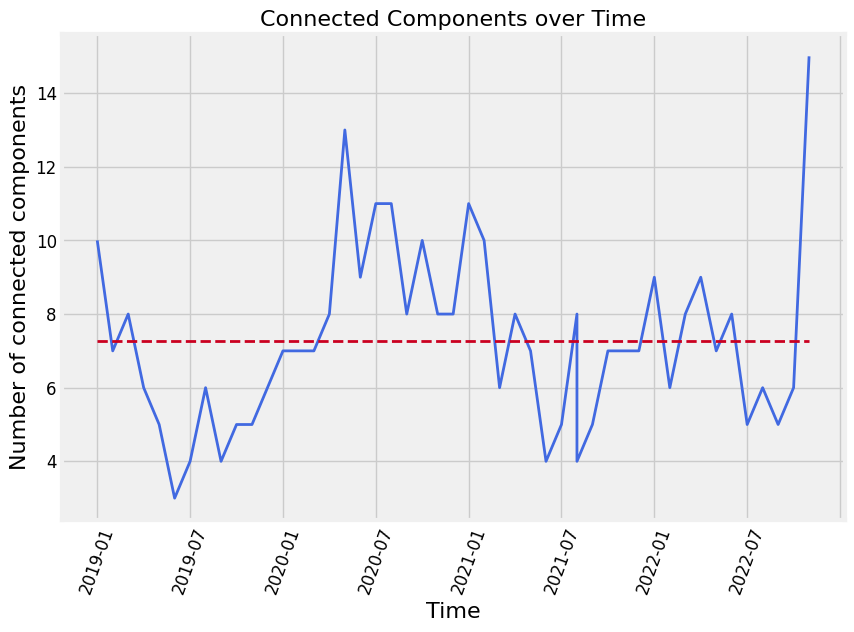

In [9]:
tgx.connected_components_per_ts(dtdg, date_ls, title= "Connected Components over Time", network_name=dataset.name, 
                                fig_size=fig_size, font_size=font_size, ticks_font_size=ticks_font_size)

### Degree Density

The goal is to plot the heatmap of node degrees per snapshot. 

The *x-axis* is the snapshot index (or timestamps), while the *y-axis* denotes the node degree.

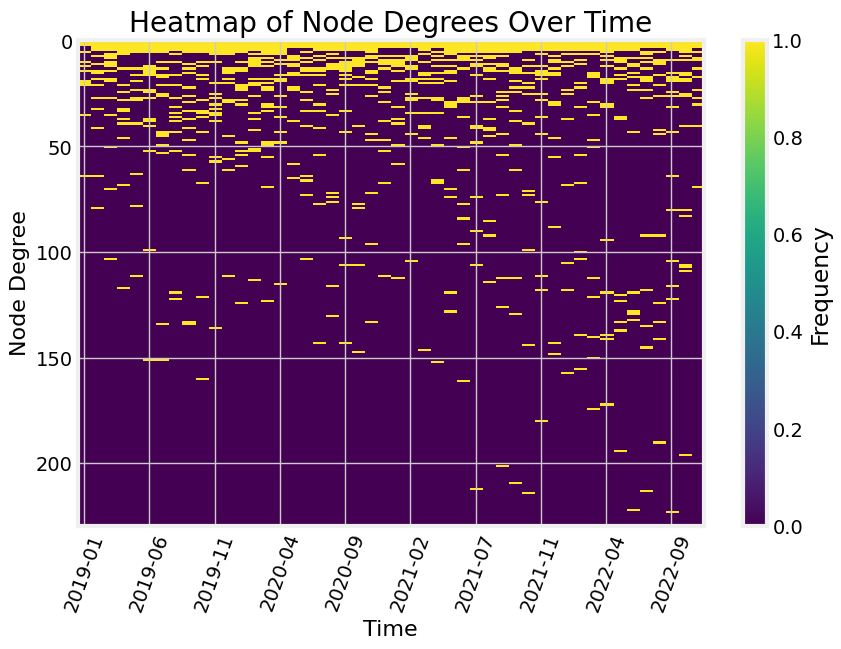

In [10]:
tgx.degree_density(dtdg, date_ls, k=1, network_name=dataset.name, fig_size=fig_size, 
                   font_size=font_size, ticks_font_size=ticks_font_size)

### Temporal Edge Appearance (TEA) Plot
A TEA plot illustrates the portion of repeated edges versus newly observed edges for each timestamp in a dynamic graph. 

This plot is proposed in [Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg).

plot saved as ./tgbl-flight_TEA.pdf


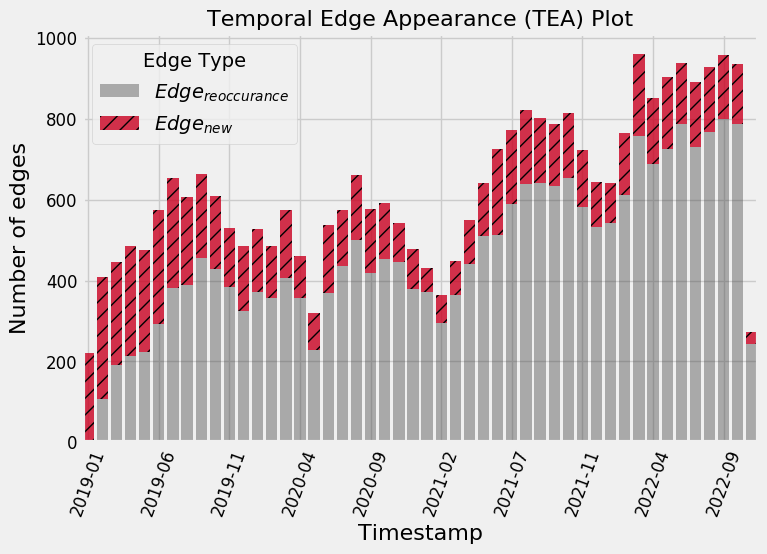

In [11]:
tgx.TEA(dtdg, 
        date_ls,
        title= "Temporal Edge Appearance (TEA) Plot",
        network_name=dataset.name,
        fig_size=fig_size,
        font_size=font_size,
        ticks_font_size=ticks_font_size)

### Temporal Edge Traffic (TET) Plot

A TET plot visualizes the reocurrence pattern of edges in different dynamic networks over time

This plot is proposed in [Poursafaei et al. 2022](https://openreview.net/forum?id=1GVpwr2Tfdg).

Info: Number of distinct edges (from index-edge map): 7742


48it [00:00, 13659.45it/s]


Info: edge-presence-matrix shape: (48, 7742)
First level processing: 
Detecting edges present in train & test sets


100%|██████████| 40/40 [00:00<00:00, 137.93it/s]


Detecting transductive edges (seen in train, repeating in test)


100%|██████████| 8/8 [00:00<00:00, 74.01it/s]


Second level processing:
Detecting edges 1) Only in train set, 2) only in test (inductive)


100%|██████████| 48/48 [00:00<00:00, 177.82it/s]


Info: edge-presence-matrix shape: (48, 7742)
Info: plotting edge presence heatmap for . ...
Info: Border edge index: 6590
Info: Test split timestamp value: 39


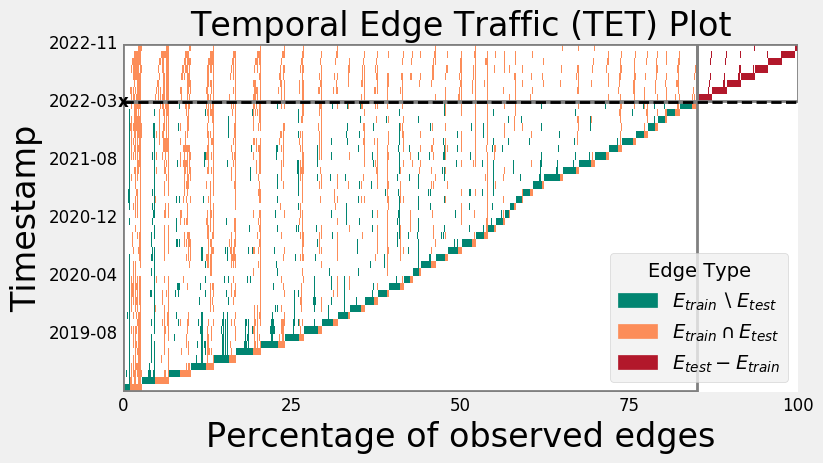

Info: plotting done!


In [12]:
tgx.TET(dtdg,
        date_ls,
        title = "Temporal Edge Traffic (TET) Plot",
        network_name=dataset.name, 
        test_split= True,
        figsize = fig_size,
        axis_title_font_size = 24,
        ticks_font_size = 12)

## Temporal Graph Statistics


TGX provides APIs to compute the statistics of temporal graphs. 

Here, we cover some the functionalities for obtaining temporal graph statistics provided by TGX. 

| Function | Description | Returns |
| --- | --- | --- |
| ```tgx.get_reoccurrence``` | Calculate the recurrence index | ```float``` |
| ```tgx.get_surprise``` | Calculate the surprise index | ```float``` |
| ```tgx.get_novelty``` | Calculate the novelty index | ```float``` |
| ```tgx.get_avg_node_activity``` | Calculate the average node activity | ```float``` |
| [```tgx.size_connected_components```](#Size-of-Connected-Components) | Calculate the sizes of connected components | ```List[List[float]]```|
| ```tgx.get_avg_node_engagement``` | Calculate the average node engagement | ```List[float]``` |


Since some the measures require distinct test split, we should first set the `test_ratio`. 
Please note that temporal graph data is generally split in a chronological manner. 

You can use `plot_for_snapshots` for visualizing the statistics reports. 

In [13]:
test_ratio = 0.15

# compute reocurrence
tgx.get_reoccurrence(ctdg, test_ratio=test_ratio)

# compute surprise
tgx.get_surprise(ctdg, test_ratio=test_ratio)

# compute novelty
tgx.get_novelty(dtdg)

# compute node activity
tgx.get_avg_node_activity(dtdg)

INFO: Reoccurrence: 0.3011518642012731
INFO: Surprise: 0.3653784733312041
INFO: Novelty: 0.28070509440027075
INFO: Node activity ratio: 0.12292412147903475


0.12292412147903475

### Size of Connected Components

You can also visualize some statistics such as how the size of the largest component changes over time.

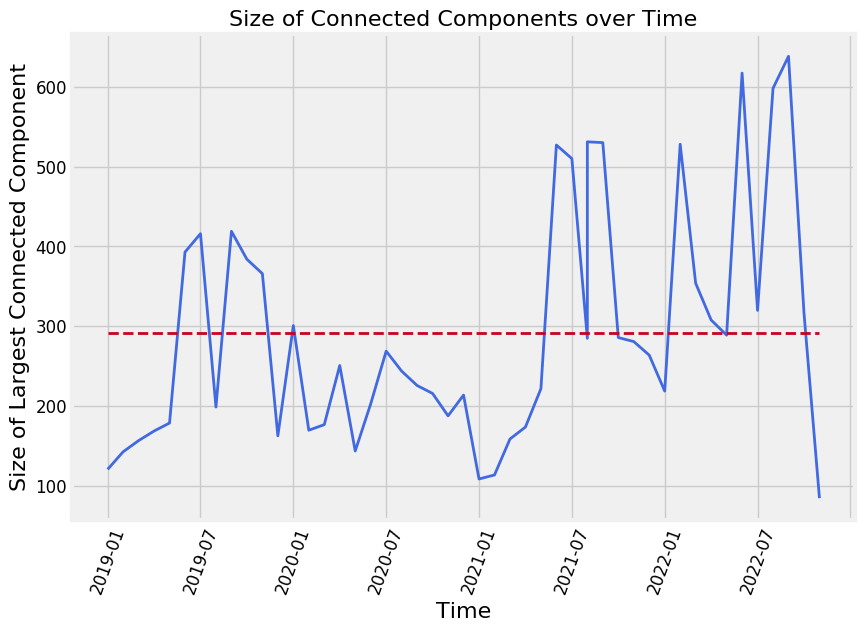

In [14]:
component_sizes = tgx.size_connected_components(dtdg)
largest_component_sizes = [max(inner_list) if inner_list else 0 for inner_list in component_sizes]
filename = f"{dataset.name}_largest_connected_component_size"
plot_for_snapshots(largest_component_sizes, date_ls, title= "Size of Connected Components over Time", y_title="Size of Largest Connected Component", filename="./"+filename,
                   fig_size= fig_size, font_size=font_size, ticks_font_size= ticks_font_size)

### Average Node Engagement

The goal is to calculate the average node engagement over time. 
*Node engagement* represents the average number of distinct nodes that establish at least one new connection during a timestamp.

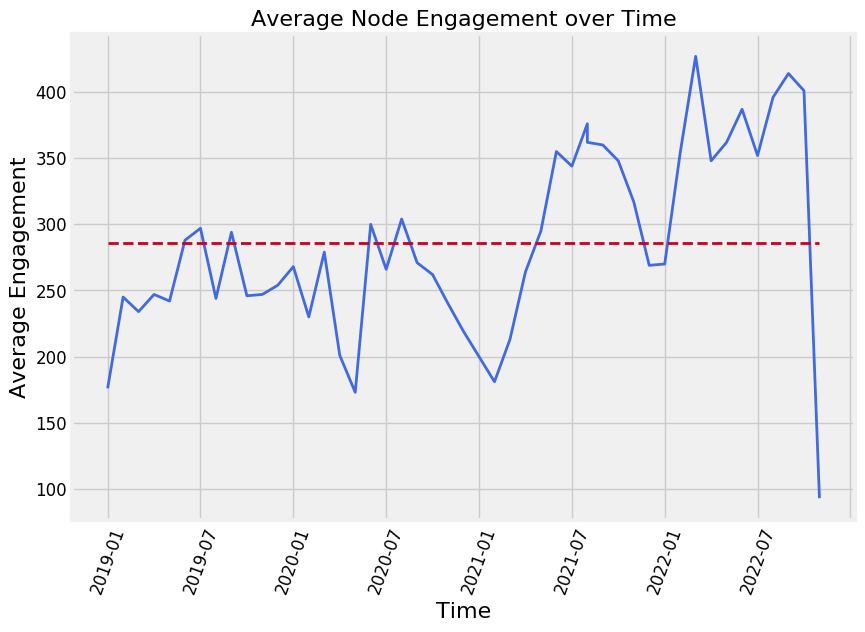

In [15]:
engagements = tgx.get_avg_node_engagement(dtdg)
filename = f"{dataset.name}_average_node_engagement"
plot_for_snapshots(engagements, date_ls, title ="Average Node Engagement over Time", y_title="Average Engagement", filename="./"+filename,
                   fig_size=fig_size, font_size= font_size, ticks_font_size= ticks_font_size)